In [1]:
using TNRKit, TensorKit, Plots, LaTeXStrings

In [2]:
χ = 48
step = 16
T = classical_ising_symmetric(Ising_βc)
scheme = BTRG(T)
sigma_list = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2,is_real=true)[2]
    @show (i,xσ);
    push!(sigma_list,xσ)
end

(i, xσ) = (1, 0.11982865203387684)
(i, xσ) = (2, 0.12892232785193483)
(i, xσ) = (3, 0.12349949617346065)
(i, xσ) = (4, 0.12583958395624875)
(i, xσ) = (5, 0.12460580648274693)
(i, xσ) = (6, 0.12520279667934653)
(i, xσ) = (7, 0.12490007795497178)
(i, xσ) = (8, 0.12505031370016167)
(i, xσ) = (9, 0.12497487179306883)
(i, xσ) = (10, 0.12501228027250544)
(i, xσ) = (11, 0.12499320495457573)
(i, xσ) = (12, 0.12500168903131834)
(i, xσ) = (13, 0.12499530299719452)
(i, xσ) = (14, 0.12499476643365236)
(i, xσ) = (15, 0.12498916222048487)
(i, xσ) = (16, 0.12498330727004833)
(i, xσ) = (17, 0.12497408031295781)
(i, xσ) = (18, 0.12496213968933442)
(i, xσ) = (19, 0.12494599899807839)
(i, xσ) = (20, 0.124924855274039)


In [3]:
χ = 48
step = 16
T = classical_ising_symmetric(Ising_βc)
scheme = TRG(T)
sigma_list_TRG = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2)[2]
    @show (i,xσ);
    push!(sigma_list_TRG,xσ)
end

(i, xσ) = (1, 0.11982865203387728)
(i, xσ) = (2, 0.1289223278519339)
(i, xσ) = (3, 0.1234994961734594)
(i, xσ) = (4, 0.12583958395624792)
(i, xσ) = (5, 0.12460580648274644)
(i, xσ) = (6, 0.12520248147870594)
(i, xσ) = (7, 0.1248988586744078)
(i, xσ) = (8, 0.12504953511005398)
(i, xσ) = (9, 0.12497688148996336)
(i, xσ) = (10, 0.12502562312753146)
(i, xσ) = (11, 0.12503777875119965)
(i, xσ) = (12, 0.12511518841592004)
(i, xσ) = (13, 0.1252449647426587)
(i, xσ) = (14, 0.12548686976738865)
(i, xσ) = (15, 0.12588938950174994)
(i, xσ) = (16, 0.12653857018754755)
(i, xσ) = (17, 0.12754314199503763)
(i, xσ) = (18, 0.12907952091523986)
(i, xσ) = (19, 0.13140204012185955)
(i, xσ) = (20, 0.1348728205445374)


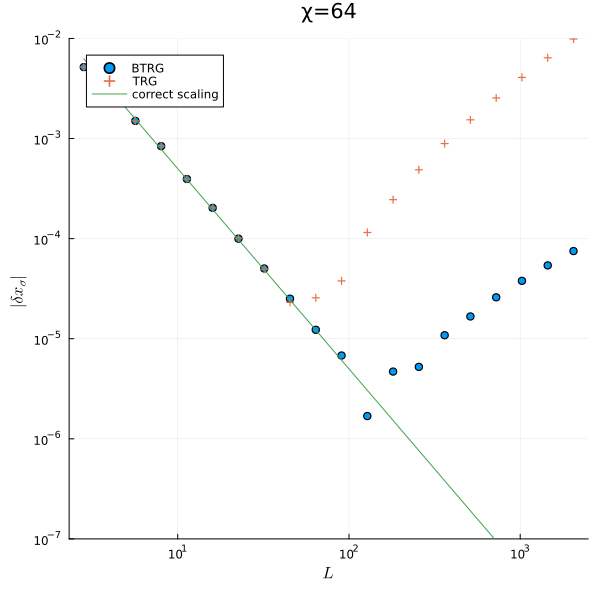

In [4]:
L_list = 2(sqrt(2.0).^collect(1:step))
scatter(L_list,abs.(1/8 .-sigma_list),xscale = :log10,yscale=:log10,size=(600,600),ylims=(1e-7,1e-2),label="BTRG",title="χ=64")
scatter!(L_list,abs.(1/8 .-sigma_list_TRG),marker=:cross,label="TRG")
plot!(L_list,0.05L_list.^(-2),label="correct scaling")
xlabel!(latexstring("L"))
ylabel!(latexstring("|δ x_σ|"))

In [5]:
function classical_Potts(q::Int64, β)
    V = ℂ^q
    A_potts = TensorMap(zeros,ComplexF64, V ⊗ V ← V ⊗ V)

    for i in 1:q
        for j in 1:q
            for k in 1:q
                for l in 1:q
                    E = -(Int(i == j) + Int(j == k) + Int(k == l) + Int(l == i))
                    A_potts[i, j, k, l] = exp(-β * E)
                end
            end
        end
    end
    return A_potts
end

function Plaquette_Potts(q::Int64, β, J□;JΔ=0.0)
    V = ℂ^q
    data = ComplexF64[Int(i==j)*Int(j==k) for i=1:q, j=1:q, k=1:q]
    δ3 = TensorMap(data, V ← V ⊗ V)
    U = isometry(fuse(V, V), V ⊗ V)
    A_potts = TensorMap(zeros,ComplexF64, V ⊗ V ← V ⊗ V)
    
    for i = 1:q
        for j = 1:q
            for k = 1:q
                for l = 1:q
                    # 0.5 factor for double counting the weight on the bond
                    E = -(Int(i == j) + Int(j == k) + Int(k == l) + Int(l == i))/2
                    E -= J□ * Int(i == j == k == l)
                    E -= JΔ * (Int(i==j==k)+Int(j==k==l)+Int(k==l==i)+Int(l==i==j))
                    A_potts[i, j, k, l] = exp(-β * E)
                end
            end
        end
    end
    @tensor Afin[-1 -2;-3 -4] := A_potts[1 2;3 4]*δ3[5;1 11]*conj(δ3[2; 6 7])*conj(δ3[10;3 8])*δ3[4;9 12]*U[-1;5 6]*U[-2;7 8]*conj(U[-3;9 10])*conj(U[-4;11 12]);
    return Afin
end

Plaquette_Potts (generic function with 1 method)

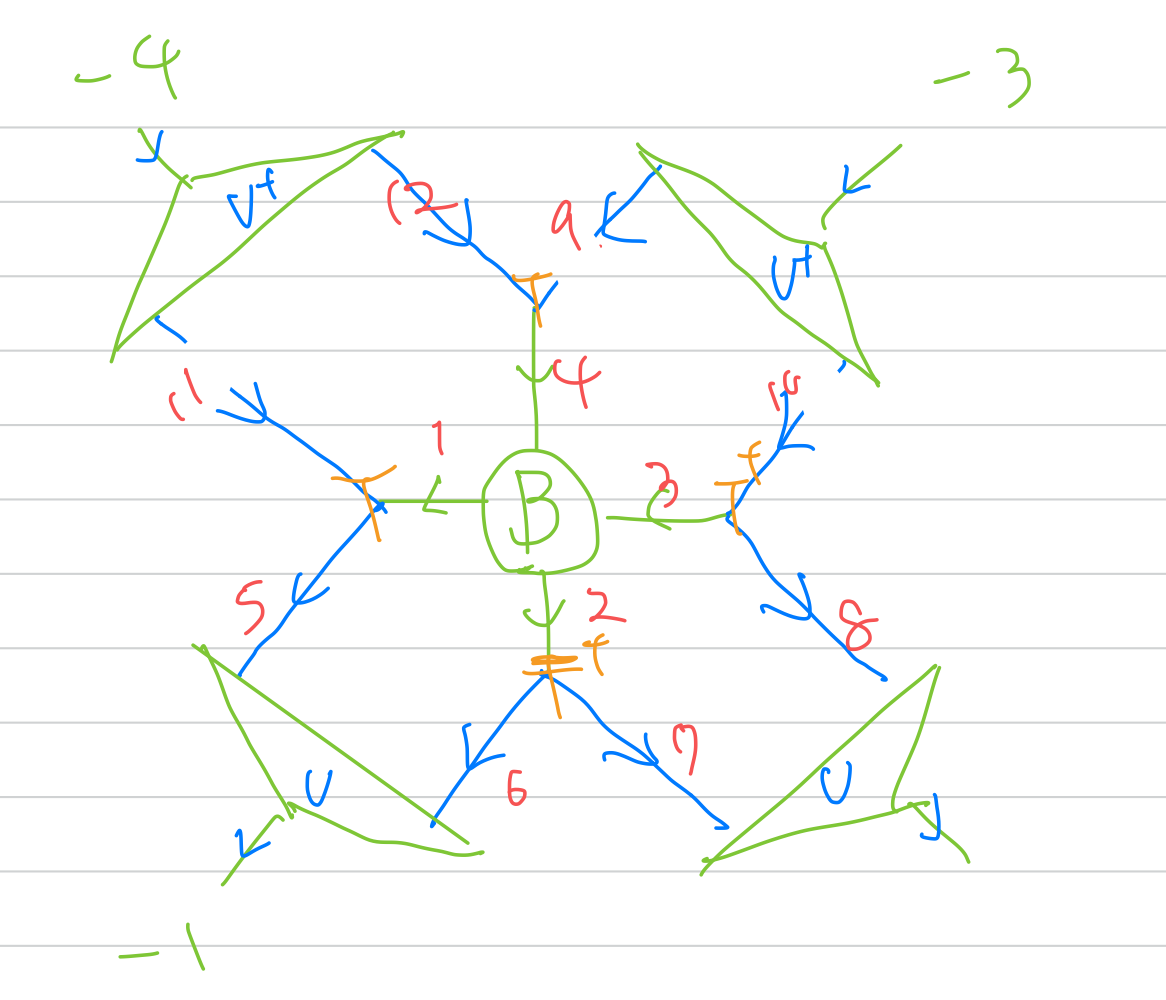
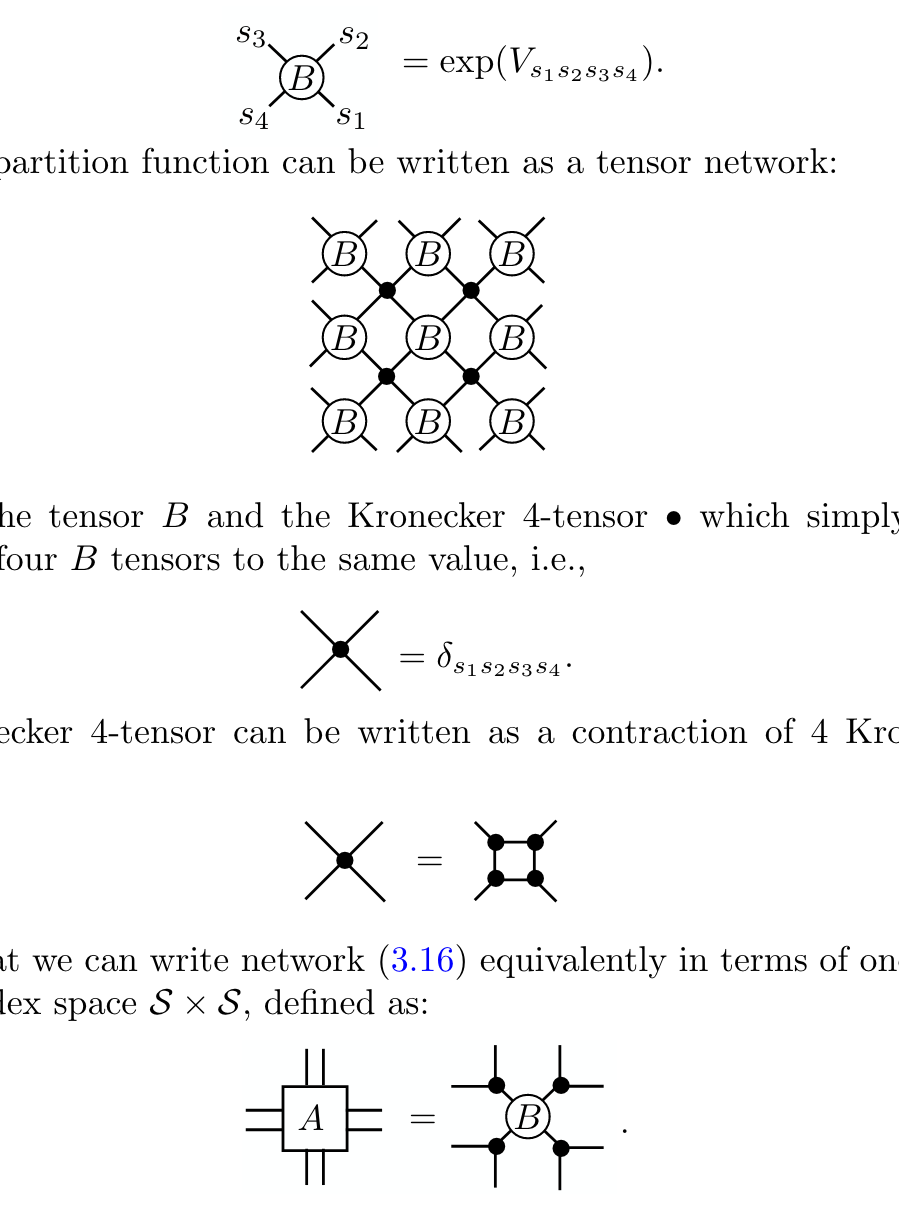

In [6]:
q = 2
χ = 32
step = 8

T = Plaquette_Potts(q,Potts_βc(q),0.0)
scheme = BTRG(T)
sigma_list = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2)[2]
    @show (i,xσ);
    push!(sigma_list,xσ)
end

(i, xσ) = (1, 0.11982865203387694)
(i, xσ) = (2, 0.12892232785193578)
(i, xσ) = (3, 0.12349949617346075)
(i, xσ) = (4, 0.12583958395624875)
(i, xσ) = (5, 0.12460580648274605)
(i, xσ) = (6, 0.12520077867534798)
(i, xσ) = (7, 0.12489406451101127)
(i, xσ) = (8, 0.12503969536254336)
(i, xσ) = (9, 0.12495230896221021)
(i, xσ) = (10, 0.1249774712614168)
(i, xσ) = (11, 0.12495794347508685)
(i, xσ) = (12, 0.12498887257126694)
(i, xσ) = (13, 0.1250541012423854)
(i, xσ) = (14, 0.12520338531649078)
(i, xσ) = (15, 0.1254732981299553)
(i, xσ) = (16, 0.12593118242341392)


# Complex CFT

We want to find a parameter for the complex CFT point.


https://arxiv.org/abs/2403.00852

There, you should get the scaling dimension to be 0.134 - 0.021im

In [8]:
target = 0.134 − 0.021im
@show target

target = 0.134 - 0.021im


0.134 - 0.021im

In [9]:
q = 5
J□ = 0.0
χ = 64
step = 5

T = Plaquette_Potts(q,Potts_βc(q),J□ )
scheme = BTRG(T)
sigma_list = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2,is_real=false)[2]
    @show (i,xσ);
    distance_to_target = target-xσ
    @show distance_to_target
    push!(sigma_list,xσ)
end

(i, xσ) = (1, 0.14227220042687927 - 8.168742871110676e-120im)
distance_to_target = 0.022570540531907105
(i, xσ) = (2, 0.1526745349747669 - 7.308867380750191e-19im)
distance_to_target = 0.028102282051886678
(i, xσ) = (3, 0.14367940440004856 - 1.3613052387688518e-17im)
distance_to_target = 0.02312338360923156
(i, xσ) = (4, 0.14659037450912754 - 8.684009799821759e-27im)
distance_to_target = 0.024485047075308807
(i, xσ) = (5, 0.15070497108234096 + 2.679167617584687e-27im)
distance_to_target = 0.026833860304880615


In [12]:
q = 5
J□ = 0.01+0.01im
χ = 48
step = 5

T = Plaquette_Potts(q,Potts_βc(q),J□)
scheme = BTRG(T)
sigma_list = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2,is_real=false)[2]
    @show (i,xσ);
    distance_to_target = target-xσ
    @show distance_to_target
    push!(sigma_list,xσ)
end

(i, xσ) = (1, 0.13655283217828665 - 0.005581840961043284im)
distance_to_target = -0.0025528321782866403 - 0.015418159038956717im


LoadError: InterruptException:

closer?

In [13]:
q = 5
J□ = 0.005+0.005im
χ = 64
step = 5

T = Plaquette_Potts(q,Potts_βc(q),J□)
scheme = BTRG(T)
sigma_list = []

for i=1:step
    run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
    xσ = cft_data(scheme;unitcell=2,is_real=false)[2]
    @show (i,xσ);
    distance_to_target = target-xσ
    @show distance_to_target
    push!(sigma_list,xσ)
end

LoadError: InterruptException:

In [14]:
function collect_sigma(J□,χ;step = 5)
    T = Plaquette_Potts(5,Potts_βc(q),J□)
    scheme = BTRG(T)
    sigma_list = []

    for i=1:step
        run!(scheme,truncdim(χ), maxiter(1); verbosity=0);
        xσ = cft_data(scheme;unitcell=2,is_real=false)[2]
        @show (i,xσ);
        distance_to_target = target-xσ
        @show distance_to_target
        push!(sigma_list,xσ)
    end
    return sigma_list
end

collect_sigma (generic function with 1 method)